In [1]:
import os
os.chdir("D:/ML_Projects/MercedesBenz-Kaggle/")
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import GridSearchCV, ShuffleSplit, KFold
import sklearn.metrics as mt
from sklearn import svm, ensemble

D:\Anaconda\envs\ml_env\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# Read the dataset
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

print("Training data size: ", train_data.shape)
print("Test data size: ", test_data.shape)

Training data size:  (4209, 378)
Test data size:  (4209, 377)


In [3]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_data.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

In [5]:
# Columns with different unique values
binary_cols, all_zero_cols, all_one_cols = [], [], []
for col in train_data.iloc[:,10:]:
    unique_vals = train_data[col].unique()
    if np.array_equal(unique_vals, [1,0]) or np.array_equal(unique_vals, [0,1]):
        binary_cols.append(col)
    elif np.array_equal(unique_vals, [0]):
        all_zero_cols.append(col)
    elif np.array_equal(unique_vals, [1]):
        all_one_cols.append(col)
    else:
        print(unique_vals)
print ("Binary Columns: ", binary_cols)
print ("Columns with only 0: ", all_zero_cols)
print ("Columns with only 1: ", all_one_cols)

Binary Columns:  ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X15

In [6]:
# Drop columns with only 0's
train_data = train_data.drop(all_zero_cols, axis=1)
test_data = test_data.drop(all_zero_cols, axis=1)

In [7]:
train_categorical_cols = train_data.iloc[:,2:10]
test_categorical_cols = test_data.iloc[:,1:9]
freq = []
col_names = []
for train_col, test_col in zip(train_categorical_cols, test_categorical_cols):
    col_names.append(train_col)
    train_freq = len(train_categorical_cols[train_col].unique())
    test_freq = len(test_categorical_cols[test_col].unique())
    freq.append([train_freq, test_freq])
categorical_freq = pd.DataFrame(freq, columns=['Train_Frequency','Test_Frequency'], index=col_names)

In [8]:
categorical_freq

,Train_Frequency,Test_Frequency
X0,47,49
X1,27,27
X2,44,45
X3,7,7
X4,4,4
X5,29,32
X6,12,12
X8,25,25


In [9]:
# Remove columns that have categories that are not seen by the training dataset. However, need a better way to deal with this.
categorical_cols_drop = ['X0','X2','X5']
train_data = train_data.drop(categorical_cols_drop, axis=1)
test_data = test_data.drop(categorical_cols_drop, axis=1)

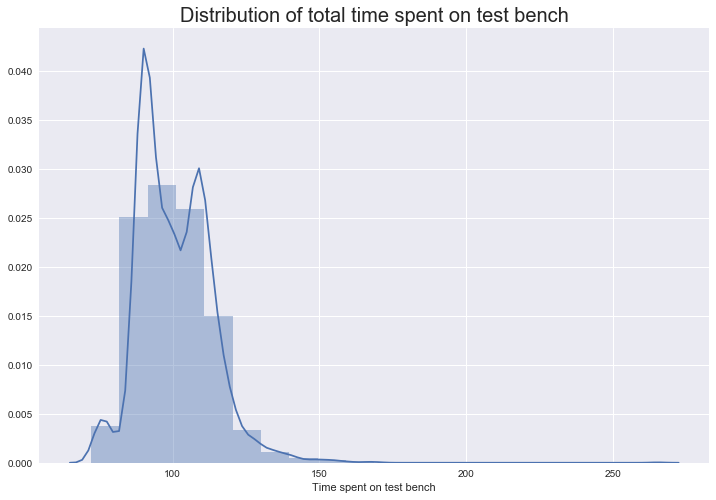

In [10]:
# Distribution of y - testing times for each car

plt.figure(figsize=(12,8))
sns.distplot(train_data.y, bins=20, axlabel = "Time spent on test bench")
plt.title("Distribution of total time spent on test bench", fontsize=20)

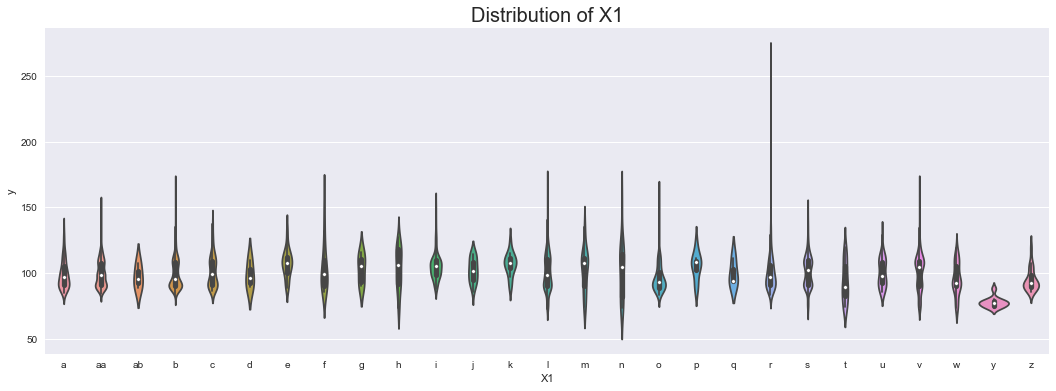

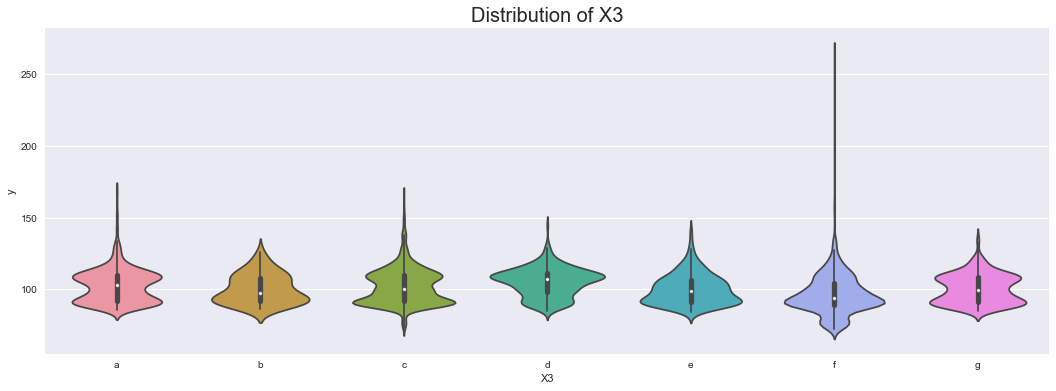

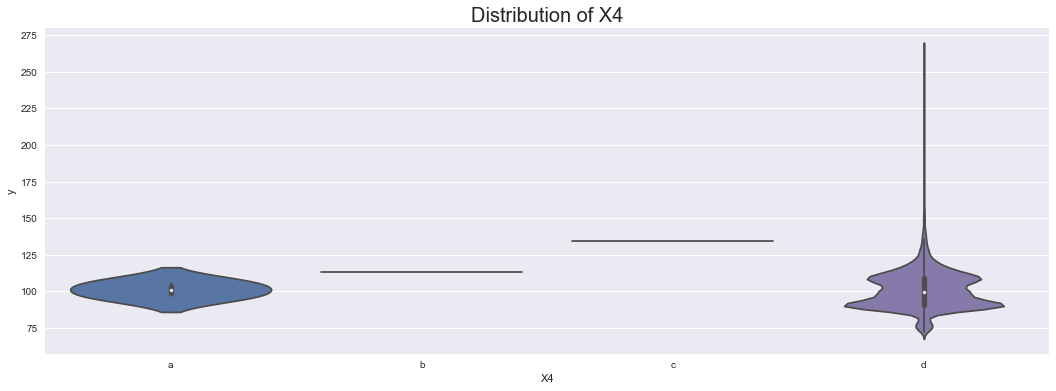

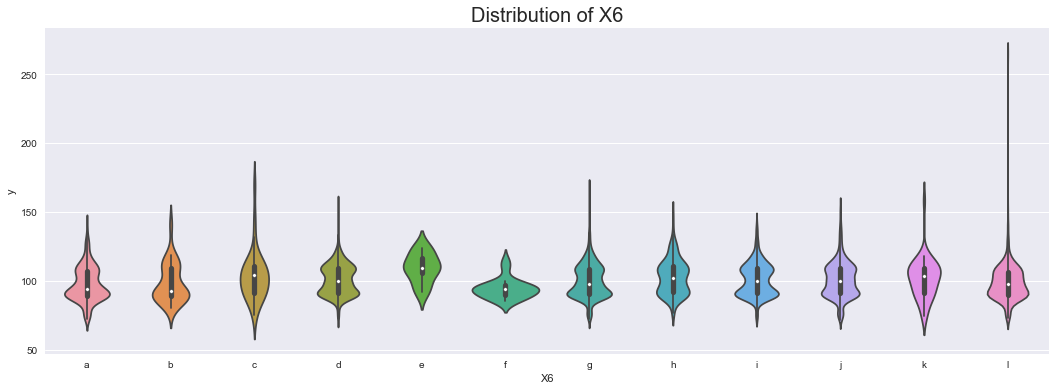

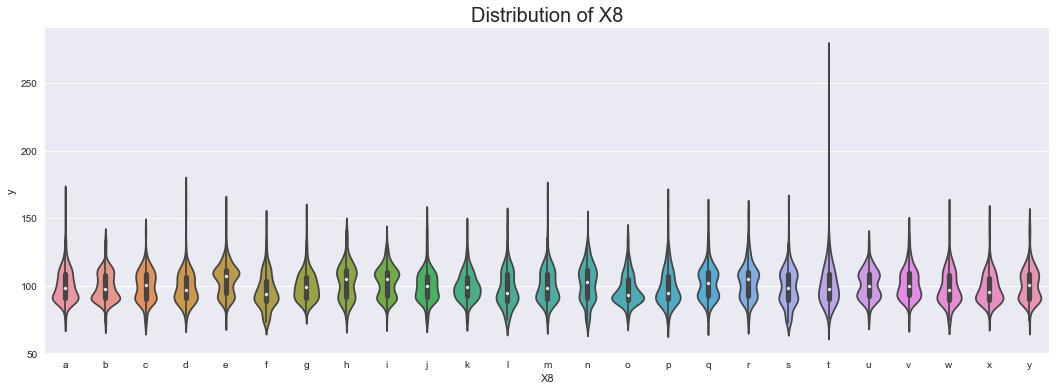

In [11]:
for categorical_col in train_data.iloc[:,2:7]:
    col_order = np.sort(train_data[categorical_col].unique()).tolist()
    plt.figure(figsize=(18,6))
    sns.violinplot(x=categorical_col,y='y', data=train_data, order=col_order)
    plt.title("Distribution of "+categorical_col, fontsize=20)

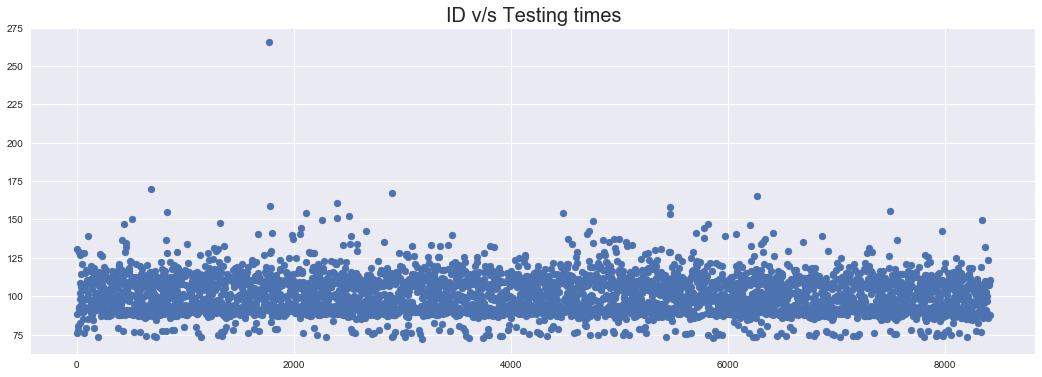

In [12]:
plt.figure(figsize=(18,6))
plt.scatter(train_data.ID, train_data.y)
plt.title("ID v/s Testing times", fontsize=20)

# Build Model

In [13]:
X_train = pd.get_dummies(train_data)
X_train = X_train.drop(['ID','y'], axis=1).values
y_train = train_data.y.values

X_test = pd.get_dummies(test_data)
y_test_id = X_test.ID.values
X_test = X_test.drop(['ID'], axis=1).values

print ("Training Samples: ", X_train.shape[0])
print ("Training Features: ", X_train.shape[1])
print ("Test Samples: ", X_test.shape[0])
print ("Test Features: ", X_test.shape[1])

Training Samples:  4209
Training Features:  431
Test Samples:  4209
Test Features:  431


## SVR

### Grid Search

In [14]:
cv_kfold = KFold(n_splits=10, shuffle=True, random_state=12548)
param_grid = {'kernel':['rbf','linear','poly','sigmoid'],
             'max_iter':[10,100,1000,-1]}
estimator = svm.SVR()
gridSearch_svr = GridSearchCV(estimator=estimator, param_grid=param_grid,
                         scoring='r2',
                         cv=cv_kfold,
                         n_jobs=-1)
gridSearch_svr.fit(X_train, y_train)
grid_scores = pd.DataFrame(gridSearch_svr.cv_results_)

In [15]:
gridSearch_svr.best_score_

0.52182298050090026

In [16]:
gridSearch_svr.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
%%time
cv_ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=12548)
reg_scores = []

for train_idx, val_idx in cv_ss.split(X_train, y_train):
    x_train_cv, y_train_cv = X_train[train_idx], y_train[train_idx]
    x_val_cv, y_val_cv = X_train[val_idx], y_train[val_idx]
    
    reg_model = gridSearch_svr.best_estimator_
    reg_model.fit(x_train_cv, y_train_cv)
    y_pred_cv = reg_model.predict(x_val_cv)
    
    r_2 = mt.r2_score(y_val_cv, y_pred_cv) # Coefficient of determination
    mse = mt.mean_squared_error(y_val_cv, y_pred_cv) # Mean squared error
    explained_var = mt.explained_variance_score(y_val_cv, y_pred_cv) # Explained variance
    
    reg_scores.append([r_2, mse, explained_var])

reg_scores = pd.DataFrame(reg_scores, columns=['R^2','MSE','Explained_Variance'])
reg_scores

Wall time: 54.8 s


### FInal Submission

In [18]:
def make_submission(reg_estimator, X_test, ID, fname='FinalSubmission'):
    y_pred = reg_estimator.predict(X_test)
    final_submission = pd.DataFrame(np.hstack([ID[:,np.newaxis], y_pred[:,np.newaxis]]), columns=['ID','y'])
    final_submission.ID = final_submission.ID.astype(int)
    final_submission.to_csv('./results/'+fname, index=False)
    return final_submission

In [19]:
svr_linear_submission = make_submission(gridSearch_svr.best_estimator_, X_test, y_test_id, fname='SVR_Linear')